In [25]:
import numpy as np
from scipy.optimize import check_grad
from sklearn.datasets import make_classification

np.random.seed(42)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#  Check gradients

In [26]:
import implementations

def check_loss_grad(loss, grad):
    X, y = make_classification(random_state=42)
    f = lambda w: loss(y, X, w)
    g = lambda w: grad(y, X, w)
    return np.mean([check_grad(f, g, np.random.randn(20)) for _ in range(100)])

In [27]:
# check logistic regression gradient
check_loss_grad(implementations.logistic_regression_loss, implementations.logistic_regression_grad)

1.1052986080383893e-07

In [240]:
# check regularized logistic regression gradient
X, y = make_classification(random_state=42)
lambda_ = 0.1
f = lambda w: implementations.logistic_regression_loss(y, X, w) + lambda_ * w @ w
g = lambda w: implementations.logistic_regression_grad(y, X, w) + 2 * lambda_ * w
np.mean([check_grad(f, g, np.random.randn(20)) for _ in range(100)])

1.516002336020378e-07

In [28]:
# check linear regression gradient
check_loss_grad(implementations.MeanSquaredError.calculate, implementations.MeanSquaredError.gradient)

6.258126173404702e-07

# Check logistic regression doing something reasonable 

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

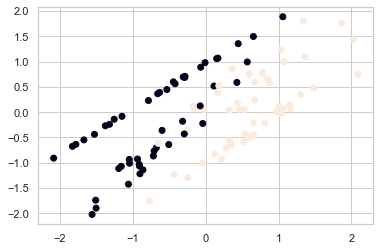

In [267]:
X, y = make_classification(random_state=42, n_features=2, n_redundant=0, class_sep=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [331]:
X = (X - X.mean(0)[None])/X.std(0, ddof=1)[None]

In [337]:
w, loss = implementations.reg_logistic_regression(y, X, 0.1, np.random.randn(2), 500, 1e-1, history=True)
p = X @ w
np.mean((p > 0).astype(int) == y), loss[-1]

(0.83, 0.5530514270326766)

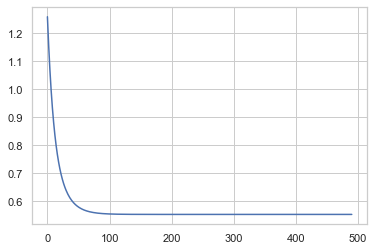

In [338]:
plt.plot(loss[10:])

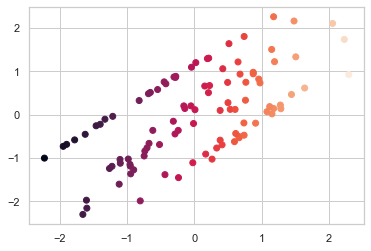

In [340]:
plt.scatter(X[:, 0], X[:, 1], c=p)